# Linear Support Vector Machine

![img](imgs/c201-a-svm.png)

```
if Gaussian-like noise on future x:

Xn further from hyperplane             distance to closest Xn
tolerate more noise           <===>    amount of noise tolerance
more robust to overfitting    <===>    robustness of hyperplane
```

robustness = fatness: distance to closest $ x_n $

#### Goal: find fattest separating hyperplane

### Definition

margin: fatness

correctness: $ y = sign \big( w^T x_n \big) $

$$ \max_w \ \ margin \big( w \big) $$

$$ y_n w^T x_n \gt 0 $$

$$ margin \big( w \big) = \min_{n=1,\cdots,N} distance \big( x_n, w \big) $$

前面章節用的 w 定義為 $ \big( w_0 = b \big), w_1, w_2, \cdots, w_d $,  
與這裏的 w 定義略有不同，把 $ w_0 $ 區分出來記為 b，

$ h(x) = sign \big( w^T x + b \big) $

### Distance to Hyperplane

want: distance(x, b, w) with hyperplane $ w^T x' + b = 0 $

![img](imgs/c201-b-distance.png)

w 是平面的法向量，考慮 x' , x'' 兩個點，  
$ w^T x' = -b $,  
$ w^T x'' = -b $

$ w \perp $ hyperplane, 因為 向量 (x'' - x') 與 $ \vec{w} $ 是 orthogonal:  
$ \Big( w^T \underbrace{\big( x'' - x' \big)}_{\text{vector on hyperplane}} \Big) = 0 $

distance = 投射 ( x - x' ) 到 $ \vec{w} $ 的長度

$ distance(x, b, w) = \Big| \frac{w^T}{\Vert w \Vert} \big( x - x' \big) \Big| = \frac{1}{\Vert w \Vert} \Big|  w^T x + b \Big| $

### Distance to Separating Hyperplane

Separating hyperplane: for every n

$$ y_n \big( w^T x_n + b \big) \gt 0 $$

distance of $ x_n $ to separating hyperplane ( y is either +1 or -1 ):

$$ distance(x_n, b, w) = \frac{1}{\Vert w \Vert} y_n \Big| \  w^T x_n + b \ \Big| $$

求解的式子轉變成:

$$ \max_{b,w} \ \ margin \big( b, w \big) $$

$$ y_n ( w^T x_n + b ) \gt 0 $$

拿掉絕對值:

$$ margin \big( b, w \big) = \min_{n=1,\cdots,N} \frac{1}{\Vert w \Vert} y_n \Big( \  w^T x_n + b \ \Big) $$

### Margin of Special Separating Hyperplane

將線的方程式 scale 縮放 後的結果是不變的。

$ w^T x + b = 0 \iff 3 w^T x + 3 b = 0 $

minimum margin 也可以縮放到剛好為 1，本質是不變的。

因此讓 $ x_1, x_2, \cdots , x_N $ 中，使得 
$ y_n \big( w^T x_n + b \big) $ 
最小的那個 $ (x_i, y_i) $ 套入式子中得到的長度是 1

$ y_i \big( w^T x_i + b \big) = 1 $

$$ margin \big( b, w \big) = \min_{n=1,\cdots,N} \frac{1}{\Vert w \Vert} y_n \Big| \  w^T x_n + b \ \Big| = \frac{1}{\Vert w \Vert} $$

求解的式子進一步轉變成:

$$ \max_{b,w} \ \ \frac{1}{\Vert w \Vert} $$

$$ y_n ( w^T x_n + b ) \gt 0 $$

條件: $ \min_{n=1,\cdots,N} y_n \big( w^T x_n + b \big) = 1 $, 這個條件已經隱含了上面大於零的意義，  
因此有這個條件就可以拿掉上面大於零的式子。

### Standard Large-Margin Hyperplane Problem

$$ \max \ \ margin(b,w) = \max_{b,w} \frac{1}{\Vert w \Vert} $$

$$ \text{,subject to: } \min_{n=1,\cdots,N} y_n \big( w^T x_n + b \big) = 1 $$

找出最小值等於一的條件不好處理，於是希望將這個條件放寬成 $ \le 1 $,   
證明這樣的放寬，仍然會找到最佳解落在原來的條件限制中:

如果"最佳解 (b,w) 落在 原始條件範圍外"， $ y_n ( w^T x_n + b ) \ge 1.126 $ for all n,  
仍然是可以縮放該式子得到 "更優化的解" : $ ( b/1.126, w/1.126 ) $, 那麼原來的 (b,w) 就不是最佳解了！Contradiction!  
所以 "最佳解 (b,w) 落在 原始條件範圍外" 為假，最佳解仍然會落在原始條件範圍內。

最後，再將最大化的部分做倒數，變成最小化問題: 

$ \max_{b,w} \frac{1}{\Vert w \Vert} \to \min_{b,w} \Vert w \Vert \to \min_{b,w} \sqrt{w^T w} \to \min_{b,w} w^T w \to \min_{b,w} \frac{1}{2} w^T w $

準備好最後要處理的問題是:

$$ \min_{b,w} \frac{1}{2} w^T w $$

$$ y_n \big( w^T x_n + b \big) \ge 1 \text{ for all n.} $$

## Quadratic Programming 二次規劃

上述的

1. 求二次方程式最小值
2. 附帶 一次方程式 的限制

是標準的 QP (Quadratic Programming) 問題：

Optimal: $ u \leftarrow QP(Q, \vec{p}, A, \vec{c}) $

Minimal: $ \min_u \frac{1}{2} u^T Q u + p^T u $

Subject to: $ a_m^T \ge C_m $, for m = 1,2,...,M

u: u向量，  
要求解 u 向量的二次函數；  
其二次的係數放在 Q 矩陣中，  
其一次項的係數放在 p 向量中。  
條件的部份，是 u向量的一次函數，係數放在 向量 $ a_m $  中，  
條件要大於的值放在 $ c_m $ 中, 有 M 個條件。  
將 向量$a_m$ 集合起來放在 A矩陣 中， $ c_m $集合起來放在 c向量 中。

將上面要求解的 SVM 問題代入:

$ u = \begin{bmatrix} b \\ w \end{bmatrix} $

$ Q = \begin{bmatrix} 0 & 0_d^T \\ 0_d & I_d \end{bmatrix} $

$ p = 0_{d+1} $

$ a_n^T = y_n \ \begin{bmatrix} 1 & x_n^T \end{bmatrix} $

$ c_n = 1, \  M = N $

$$ \begin{bmatrix} b \\ w \end{bmatrix} \leftarrow QP( Q, \vec{p}, A, \vec{c} ) $$

### Example

以四個點來看
```
x1 = (0,0), y1 = -1
x2 = (2,2), y1 = -1
x3 = (2,0), y1 = +1
x4 = (3,0), y1 = +1
```

$ a_1^T = [-1, 0, 0] $  
$ a_2^T = [-1,-2,-2] $  
$ a_3^T = [ 1, 2, 0] $  
$ a_4^T = [ 1, 3, 0] $

$$ \frac{1}{2} u^T Q u + p^T u $$

$ \vec{u} = \begin{bmatrix} b \\ w_1 \\ w_2 \end{bmatrix} $

$ \begin{bmatrix} b & w_1 & w_2 \end{bmatrix} \ $
$ \underbrace{ \begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & -1 \\
0 & 1 & 1
\end{bmatrix} }_{Q} $
$ \ \begin{bmatrix} b \\ w_1 \\ w_2 \end{bmatrix} + $
$ \underbrace{ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix} }_{p^T} $
$ \begin{bmatrix} b \\ w_1 \\ w_2 \end{bmatrix} $

$$ y_n \big( w^T x_n + b \big) \ge 1 $$

$ a_1: (-1) \big( \begin{bmatrix} w_1 & w_2 \end{bmatrix} $
$ \begin{bmatrix} 0 \\ 0 \end{bmatrix} + b \big) \ge 1 \to -b +0 w_1 +0 w_2 \ge 1 $

$ a_2: (-1) \big( \begin{bmatrix} w_1 & w_2 \end{bmatrix} $
$ \begin{bmatrix} 2 \\ 2 \end{bmatrix} + b \big) \ge 1 \to -b -2 w_1 -2 w_2 \ge 1 $

$ a_3: (+1) \big( \begin{bmatrix} w_1 & w_2 \end{bmatrix} $
$ \begin{bmatrix} 2 \\ 0 \end{bmatrix} + b \big) \ge 1 \to +b +2 w_1 +0 w_2 \ge 1 $

$ a_4: (+1) \big( \begin{bmatrix} w_1 & w_2 \end{bmatrix} $
$ \begin{bmatrix} 3 \\ 0 \end{bmatrix} + b \big) \ge 1 \to +b +3 w_1 +0 w_2 \ge 1 $

$ A = \begin{bmatrix} \vec{a_1} & \vec{a_2} & \vec{a_3} & \vec{a_4} \end{bmatrix} = $
$ \begin{bmatrix} -1&-1&+1&+1 \\ 0&-2&2&3 \\ 0&-2&0&0 \end{bmatrix} $

$ \vec{c} = \begin{bmatrix} 1&1&1&1 \end{bmatrix} $

     pcost       dcost       gap    pres   dres
 0:  1.0724e-01  4.3594e+00  1e+01  2e+00  3e+01
 1:  1.2367e+00 -1.5599e+00  4e+00  3e-01  5e+00
 2:  1.0096e+00  5.8412e-01  4e-01  4e-16  2e-15
 3:  7.7189e-01  7.5386e-01  2e-02  2e-16  1e-15
 4:  7.6649e-01  7.6631e-01  2e-04  3e-16  2e-15
 5:  7.6644e-01  7.6644e-01  2e-06  3e-16  8e-16
 6:  7.6644e-01  7.6644e-01  2e-08  3e-16  2e-15
Optimal solution found.
Solution [b w1 w2] = [-2.33  0.95 -0.29]



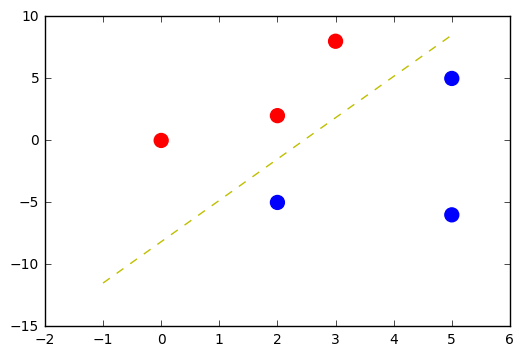

In [1]:
from cvxopt import matrix, solvers, printing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

printing.options['dformat'] = '%.2f'

x1 = matrix(np.array([0,2,3,2, 5,5]).astype(float))
x2 = matrix(np.array([0,2,8,-5,5,-6]).astype(float))

#x1 = matrix([0,2,2,3])
#x2 = matrix([0,2,0,0])
y = matrix(np.array([-1,-1,-1,+1,+1,+1]).astype(float))

# CVXOPT 的一次條件式用 <=, 所以再乘以 -1, 轉換成小於
ay = np.array(y)
ax1 = np.array(x1)
ax2 = np.array(x2) 
A = matrix(np.concatenate((-y, -ay * ax1, -ay * ax2), axis=1))
# A = matrix([[ 1.0, 1.0,-1.0,-1.0],
#             [ 0.0, 2.0,-2.0,-3.0],
#             [ 0.0, 2.0, 0.0, 0.0]])

Q = matrix([[0.0, 0.0, 0.0],
            [0.0, 1.0,-1.0],
            [0.0, 1.0, 1.0]])

p = matrix([0.0,0.0,0.0])

c = matrix(np.repeat(-1.0, len(y)))

sol=solvers.qp(P=Q, q=p, G=A, h=c)

print('Solution [b w1 w2] = %s' % sol['x'].T)

b = sol['x'][0]
w1 = sol['x'][1]
w2 = sol['x'][2]
colors = ['B' if yi > 0 else 'R' for yi in y]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x1, x2, s=100, color=colors)

def x1_to_x2(x1):
    return (-b - w1 * x1) / w2

linex = np.arange(-1.0, 6., 1)
liney = [x1_to_x2(xi) for xi in linex]
line1 = ax.plot(linex, liney, '--', color='Y')
plt.show()

### Linear Hard-Margin SVM Algorithm

Linear: 使用原來的 x，直線

Hard-Margin: 必須嚴格分開 + / -

want non-linear? $ z_n = \Phi \big( x_n \big) $

### Why Large-Margin Hyperplane ?

$$ \min_{b,w} \frac{1}{2} w^T w $$

$$ y_n \big( w^T z_n + b \big) \ge 1 \text{ for all n.} $$

note: x 經過 $ \Phi $ transform 到 z 空間

比較 Regularization 與 SVM 算法中，兩者做的事情是一體兩面，所求的 minimize 與 constraint 互換。  
SVM 可以看作是一種 Regularization, 著重在可以抵抗一些測量誤差上。

| |minimize|constraint|
|-|-|-|
| regularization | $ E_{in} $ | $ w^T w \le C $ |
| SVM | $ w^T w $ | $ E_{in} = 0 $ |

### Large-Margin Restricts Dichotomies

Consider "Large-Margin" algorithm $ A_{\rho} $ :

- returns g with margin(g) $ \ge \rho $
- otherwise return 0 if cannot find margin large enough.

三個點在 $ \mathcal{R}^2 $ 空間，沒有限制去做 shatter, 可有 $ 2^3 $ 八種方式 dichotomies。

但如果限定 margin 最少要有 p 的大小，就不一定做得出八種方式。

Fewer dichotomies --> smaller VC dimension --> better generalization

### VC Dimension of Large-Margin Algorithm

$$ d_{VC} \big( A_{\rho} \big) \text{ when } X = \text{ unit circle } in \mathcal{R}^2 $$

若是資料 x 都在單位圓(半徑=1)範圍內，  
如果限制 min margin $ \rho \gt \frac{\sqrt{3}}{2} $  
則任何三個點都無法 shatter, $ d_{VC} \lt 3 $

一般來說，當 x in radius-R hyperball:

$$ d_{VC} \big( A_{\rho} \big) \le \min \Big( \frac{R^2}{\rho^2} \Big) + 1 \le \underbrace{d + 1}_{ d_{VC}(\text{ perceptrons }) } $$

> 可以利用 $ \rho $ 降低 VC dimension, 控制算法的複雜度。

原本的空間轉換 Feature Transform 可以帶來複雜的 boundary, 卻發生增加了許多 hypothesis 的問題，  
可以結合 SVM 的 margin 控制，不要增加太多 hypothesis, 但還是獲得複雜的 boundary。